In [3]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


/Users/lovedeepsingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/lovedeepsingh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


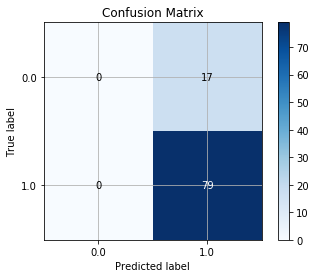

Accuracy = 82.29%
Precision = 82.29%
Recall = 100.00%
(300,)
[-1.23961590e-01 -9.37919468e-02 -2.95948714e-01  1.06799647e-01
 -1.76123738e-01  4.62098755e-02  6.08501546e-02 -4.45626765e-01
 -5.66376388e-01  1.54284805e-01 -2.98765749e-01 -3.12649846e-01
  5.11347391e-02 -3.05354774e-01  2.54974157e-01 -9.95864347e-02
  2.35373974e-02 -3.18755567e-01  1.38518631e-01  1.64007545e-02
  5.89559367e-03 -2.99937427e-01 -1.37306243e-01  7.92893246e-02
 -2.09098421e-02  5.43357320e-02  1.78720057e-01 -1.35750830e-01
 -5.80481663e-02 -1.36216551e-01 -5.80860935e-02  7.32868388e-02
 -4.88748029e-02  1.21214516e-01 -2.53421009e-01  4.55138087e-02
  4.21074808e-01 -4.51108962e-01 -6.71346337e-02  1.44472597e-02
  1.82765812e-01  5.48675776e-01  1.96002200e-01 -1.38661591e-02
  3.94583613e-01  1.04714662e-01  1.55213192e-01 -3.39946412e-02
  3.52916658e-01  3.67560655e-01 -7.35104159e-02  1.51317388e-01
  2.16869727e-01  5.50032109e-02 -4.86164272e-01  3.52371000e-02
 -1.44144788e-01  4.14855123e

In [3]:
from getEmbeddings import getEmbeddings
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import pandas as pd


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()


xtr,xte,ytr,yte = getEmbeddings("datasets/kaggle.csv")
np.save('./xtr', xtr)
np.save('./xte', xte)
np.save('./ytr', ytr)
np.save('./yte', yte)

#print(pd.read_csv("datasets/combined_csv.csv")['text'][82])
#print(xte)
# print(xte[82].shape)
# print(xte[82])
# print(xte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')
xttr,xtte,yttr,ytte = getEmbeddings("datasets/combined_csv.csv")
clf = SVC()
clf.fit(xtr, ytr)
y_pred = clf.predict(xtte)
m = ytte.shape[0]
n = (ytte != y_pred).sum()
tp = ((ytte == y_pred) & (y_pred == 1)).sum()
tn = ((ytte == y_pred) & (y_pred == 0)).sum()
fp = ((ytte != y_pred) & (y_pred == 1)).sum()
fn = ((ytte != y_pred) & (y_pred == 0)).sum()
plot_cmat(ytte, y_pred)

print("Accuracy = " + format((tp+tn)/m*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")  



print(xte[82].shape)
print(xte[82])
print(xte)

/Users/lovedeepsingh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


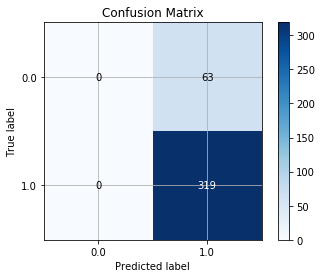

In [5]:
y_pred = clf.predict(xttr)
m = yttr.shape[0]
n = (yttr != y_pred).sum()
tp = ((yttr == y_pred) & (y_pred == 1)).sum()
tn = ((yttr == y_pred) & (y_pred == 0)).sum()
fp = ((yttr != y_pred) & (y_pred == 1)).sum()
fn = ((yttr != y_pred) & (y_pred == 0)).sum()
plot_cmat(yttr, y_pred)



/Users/lovedeepsingh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


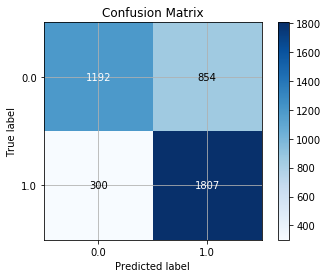

Accuracy = 72.21%
Precision = 67.91%
Recall = 85.76%


In [40]:
from getEmbeddings import getEmbeddings
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()


xtr,xte,ytr,yte = getEmbeddings("datasets/kaggle.csv")
np.save('./xtr', xtr)
np.save('./xte', xte)
np.save('./ytr', ytr)
np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

gnb = GaussianNB()
gnb.fit(xtr,ytr)
y_pred = gnb.predict(xte)
m = yte.shape[0]
n = (yte != y_pred).sum()
tp = ((yte == y_pred) & (y_pred == 1)).sum()
tn = ((yte == y_pred) & (y_pred == 0)).sum()
fp = ((yte != y_pred) & (y_pred == 1)).sum()
fn = ((yte != y_pred) & (y_pred == 0)).sum()
plot_cmat(yte, y_pred)

print("Accuracy = " + format((tp+tn)/m*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")  


